# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

The *Smartcab* remains idle during each time step of any trial, taking no action. The other cabs move randomly with no rules. However, the position of the *Smartcab* and the deadline changes in the begining of every trail. But as the project is about training the *Smartcab*, single agent, the behavior of other agents do not affect it. The knowledge of the position of other agents is, however important to avoid any accidents, is also not known to the *Smartcab*.

The rewards seems to be randomly assigned at each time step. If there are any voilations then the rewards are negative penalizing the agent, for instance, when the Smartcab idles in a green light with no incoming traffic. If there is no voilation and the agent makes a legal decision then a positive reward is awarded. 

As the agent is not enforced to meet deadlines there is no penalty for not meeting the deadline.

Based on the U.S. right-of-way traffic laws, the agent is awarded rewards. If the light is green, and there is no oncoming traffic, the agent is expected to move, but as there is no movement from the agent, it is penalized heavily and if there is an oncoming traffic it is awarded with a positive reward. 

In case of a red light, as we know the agent is not moving it is always being awarded positive reward as it does not move making a legal decision.

- The Smartcab is not moving during the simulation. It stays idle without taking any action.
- The rewards seems randomly generated at each step.
    - whenever the smartcab makes a violation then the rewards are negative,
    - while it is positive if the agent is correct.
- The light changing color affects the reward.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

**`agent.py`**  
- `'verbose'` : allows the simulator to display verbose outputs so as to help in debugging.
- `'learning'` : allows the agent to learn, that is, explore, 
- `'testing'` : allows the agent to exploit whatever it has learnt

**`environment.py`**  
`'act()'` function of the Environment class is called when an agent performs an action
This function determines the reward for the action taken by the agent at each time step. Positive rewards are given when the agent performs correct action, and is penalized with negative rewards in case of voilation or accidents. It also penalizes the agent based on time left to reach destination, to ensure that it reaches the destination in least time.

**`simulator.py`**  

| `'render_text'` | `'render()'` |
| :--- | :--- |
| A Non-GUI render display | A GUI render display |
| Called whenever the simulator is run | Called only when the GUI is set to be displayed |
| Text messages are displayed based on the data on execution | The GUI of the simulator is rendered along with the necessary text messages on the pygame window. |

**`planner.py`**  
- The next waypoint considers the East-West Direction first.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


,average_reward,reliability_rate,good_actions,good,minor,major,minor_acc,major_acc,accd,voil
9,-5.035561,20.0,16,0.614476,0.099857,0.170905,0.051429,0.063333,0.114762,0.270762
10,-4.265858,20.0,19,0.630476,0.115857,0.164905,0.036429,0.052333,0.088762,0.280762
11,-4.328619,20.0,7,0.610476,0.119857,0.176905,0.048429,0.044333,0.092762,0.296762
12,-4.615024,20.0,14,0.600476,0.119857,0.176905,0.053429,0.049333,0.102762,0.296762
13,-4.554198,30.0,7,0.596113,0.124948,0.169996,0.063610,0.045333,0.108944,0.294944
14,-4.811056,20.0,13,0.590970,0.119424,0.173424,0.066848,0.049333,0.116182,0.292848
15,-4.965999,10.0,15,0.595970,0.094424,0.188424,0.071848,0.049333,0.121182,0.282848
16,-4.915324,10.0,14,0.592636,0.086091,0.200091,0.078515,0.042667,0.121182,0.286182
17,-4.829574,20.0,11,0.593386,0.088341,0.197091,0.078515,0.042667,0.121182,0.285432
18,-4.727303,30.0,6,0.587932,0.077432,0.219364,0.082606,0.032667,0.115273,0.296795


,average_reward,reliability_rate,good_actions,good,minor,major,minor_acc,major_acc,accd,voil
20,-4.289007,30.0,20,0.623598,0.058098,0.213030,0.075939,0.029333,0.105273,0.271129
21,-3.430600,40.0,17,0.666432,0.066765,0.189364,0.051939,0.025500,0.077439,0.256129
22,-3.365509,40.0,15,0.646432,0.086765,0.194364,0.053606,0.018833,0.072439,0.281129
23,-3.587057,30.0,11,0.637795,0.082674,0.210273,0.045424,0.023833,0.069258,0.292947
24,-3.399573,30.0,12,0.645795,0.093674,0.198273,0.037424,0.024833,0.062258,0.291947
25,-3.407529,30.0,20,0.650795,0.100674,0.187273,0.032424,0.028833,0.061258,0.287947
26,-2.868882,30.0,20,0.684129,0.102008,0.162606,0.025758,0.025500,0.051258,0.264614
27,-3.934254,30.0,4,0.659823,0.106869,0.148717,0.036869,0.047722,0.084591,0.255586
28,-3.780328,20.0,13,0.670278,0.102778,0.146444,0.032778,0.047722,0.080500,0.249222
29,-4.464188,30.0,5,0.656706,0.092778,0.141444,0.047063,0.062008,0.109071,0.234222


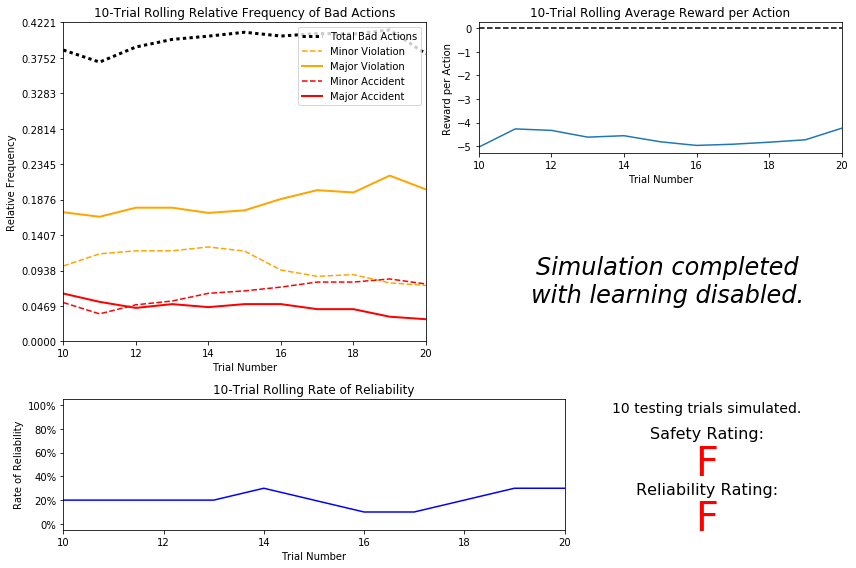

In [3]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

The Basic Agent is driving randomly and not learning. The agent gets the lowest grade **F** for both Safety and Reliability. The visualizations illustrates that this agent is making many bad decisions and has been heavily penalized with no reliablility.

##### Frequency of Bad Actions:
It is evident from the above visualization that the *Basic Agent* is making bad decisions around 40% of the total time step in each trial. Amongst the total bad decisions around 10% of them lead to accidents and remaining are traffic law violations. The frequency of bad decision, as is illustrated in the above plot, is fairly stable, with an occassional peaks, but on an average remaining the same. This suggests that the agent is not exploiting after exploration, which is also supported from the given that the agent is making random actions.

##### Rate if reliability
As this driving agent is making random decisions and not learning anything, it cannot be reliable. This is obvious, from the visualization, as the rate of reliability is quite low, as low as 20%. We can also see that the reliability rating is F, which means, the agent fails to reach the destination on time for most of the trips.

##### Rewards received by Agent:
The total rewards after every trial is negative, indicating that the agent is penalized for its random actions. This plot too plateaus and does not change to indicate any improvement in the agents behaviour. As the negative values are less than -4 in all the trials we can say that the agent is heavily penalized. It is making bad decisions more than 40% of the time. 

##### Outcome with increase in Trials 
All the plots of the visualization remains constant, forming plateau, which means there is no significant change in the outcome with increase in trails.

##### Safe and/or Reliable?
As we can see there are more than 40% times the agent makes bad decision, the rate of reliability is extremely low, the rating of both Safety and Reliability scale is F marking a very bad result. Thus the agent is neither safe nor reliable.

will never use the  Random Driving agent without any action does not add anything to reliability. There is no meaning to that graph and as seen it flattens at zero percentage, indicating no change whatsoever.

We can see that the rewards for the trials are in negative value suggesting that the *Smartcab* is not behaving as it is expected. These must be attributed to the *Smartcab* making many bad decisions as per the previous chart.

Due to the stochastic nature of the envirnoment we find that the bad decisions are not a straight line, but an average line through would be parallel, indicating here too there is no change and thus an increase in the trials cannot make any difference. This is clear from the fact that the *Smartcab* is not learning anything to use, meaning it is not exploring to exploit.

The accidents, voilations should be zero for it to be safe and that the *Smartcab* should be getting positive rewards for letting us know it has reached the desitination on time - being reliable. Since, none of this is happening it is not recommended.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:**

##### The following are the features selected for defining the state:
- `'waypoint'` defines the direction the *Smartcab* should drive to reach the destination. This feature will assist the *Smartcab* to take decisions on leading to the destination in shortest time. Thus, it will support the agent to be realiable. However, this feature does not inform the *Smartcab* to avoid accidents and violations and hence does not guide towards safety.
- `'light'` defines the color of the traffic lights at the intersection where the *Smartcab* is. This will aid the agent in driving safely following the traffic rules. 
- `'left'`, `'oncoming'` defines the direction of the vehicle at the intersection the *Smartcab* is approaching. These features are necessary for the *Smartcab* as it informs the *Smartcab* about the approaching traffic. These features will help the agent to avoid accidents, thus ensure safety.

##### The following features are not selected for defining the state:
- `'right'` defines the direction of the vechicle at the right of the *Smartcab*. As the *Smartcab* is trained on US-right of way, it is not necessary to record for right incoming traffic, as those will always be allowed to go, and *Smartcab* can follow too.
- `'deadline'` defines the number of action remaining for the *Smartcab* to reach destination. As at every trials the destination may change and the combination may change. is also not selected as there may be many different random values for this which may lead to considerable size of state space as already explained above, never learn what to do. 

##### Features Selected
| Safety | Reliability |
| --- | --- | 
| `'waypoint'` |`'light'`, `'left'`, `'oncoming'` |
##### Features Not Selected

+ `'right'` 
+ `'deadline'`

---


### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

From the above it is evident that the features selected to define state is:
(waypoint, light, oncoming, left)

Based on what we know of the possible values of the features we can say,

| Features | Number of Values | Values |
| --- | --- | --- |
| waypoint | 3 values | *`{'forward', 'left', 'right'}`* |
| oncoming, left traffic |  4 values each | *`{'None', 'forward', 'left', 'right'}`* | 
| traffic lights | 2 values | *`{'green', 'red'}`* |

In [15]:
State_size = 3 * 4 * 4 * 2 # #waypoint * #oncoming * #left-traffic * #traffic-lights
Action_size = 4 # {'None', 'forward', 'left', 'right'}
print "Size of the State space = {}".format(State_size)
print "Possible action space = {}".format(Action_size)
print "Required least combinations for Q-Learning = {}".format(State_size * Action_size) 

Size of the State space = 96
Possible action space = 4
Required least combinations for Q-Learning = 384


As the size of the State space and the action space is finite, these form valid MDPs. And we know that Q-learning can be used to find an optimal action-selection policy for any given (finite) Markov decision process (MDP). It has been proven that for any finite MDP, Q-learning eventually finds an optimal policy, in the sense that the expected value of the total reward return over all successive steps, starting from the current state, is the maximum achievable. 

Thus, we can say 



### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

,average_reward,reliability_rate,good_actions,good,minor,major,minor_acc,major_acc,accd,voil
9,-4.513883,10.0,16,0.669965,0.054667,0.177710,0.027857,0.069801,0.097658,0.232377
10,-4.627476,10.0,20,0.684965,0.044667,0.161710,0.031857,0.076801,0.108658,0.206377
11,-4.699062,10.0,19,0.694299,0.042000,0.146377,0.035857,0.081468,0.117325,0.188377
12,-4.600266,10.0,26,0.710965,0.043667,0.124710,0.035857,0.084801,0.120658,0.168377
13,-4.783753,0.0,17,0.706238,0.043667,0.119619,0.043857,0.086619,0.130476,0.163286
14,-3.988528,10.0,18,0.732404,0.048930,0.105333,0.041000,0.072333,0.113333,0.154263
15,-3.416496,10.0,22,0.765404,0.043930,0.087333,0.036000,0.067333,0.103333,0.131263
16,-2.441630,10.0,19,0.805404,0.033930,0.082333,0.026000,0.052333,0.078333,0.116263
17,-2.317899,20.0,16,0.822292,0.031485,0.066333,0.026000,0.053889,0.079889,0.097819
18,-1.775769,20.0,19,0.852292,0.021485,0.056333,0.021000,0.048889,0.069889,0.077819


,average_reward,reliability_rate,good_actions,good,minor,major,minor_acc,major_acc,accd,voil
20,-1.043394,20.0,18,0.877292,0.026485,0.042333,0.017,0.036889,0.053889,0.068819
21,-0.672859,20.0,29,0.897959,0.022485,0.034333,0.013,0.032222,0.045222,0.056819
22,-0.552386,20.0,19,0.906292,0.015819,0.031000,0.018,0.028889,0.046889,0.046819
23,0.462388,20.0,25,0.938292,0.015819,0.027000,0.010,0.008889,0.018889,0.042819
24,0.450872,10.0,24,0.939556,0.010556,0.031000,0.010,0.008889,0.018889,0.041556
25,0.347130,10.0,18,0.941556,0.015556,0.019000,0.010,0.013889,0.023889,0.034556
26,0.396826,10.0,30,0.946556,0.015556,0.014000,0.010,0.013889,0.023889,0.029556
27,0.549234,0.0,19,0.952667,0.010000,0.014000,0.015,0.008333,0.023333,0.024000
28,0.284121,10.0,12,0.949974,0.010000,0.009000,0.015,0.016026,0.031026,0.019000
29,0.045460,10.0,18,0.944974,0.010000,0.009000,0.015,0.021026,0.036026,0.019000


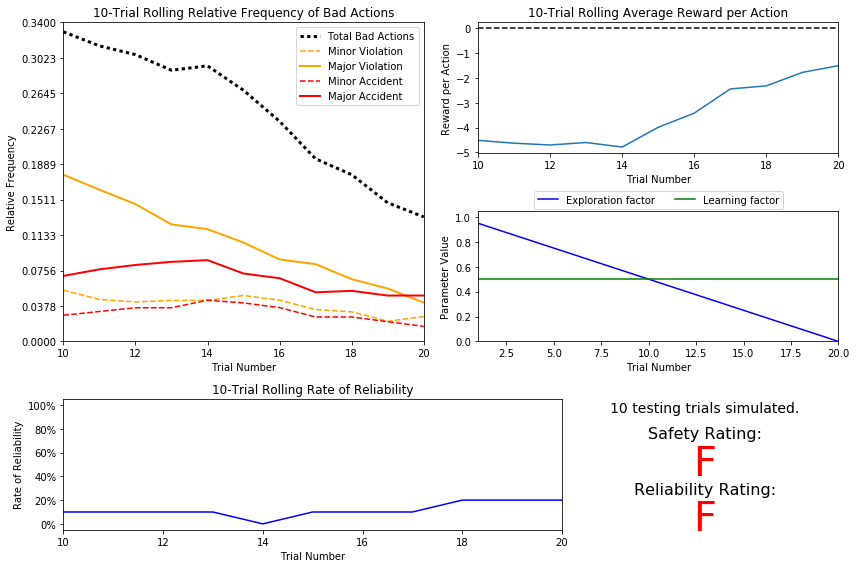

In [10]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:

- How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?
- Given that the agent is driving randomly, does the rate of reliabilty make sense?
- What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?
- As the number of trials increases, does the outcome of results change significantly?
- Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?


**Answer:**

##### Similarity between above two observation:
Comparing the above visulaization with the one on the top it is clear that the reliability factor is quite similar to the no learning agent. This default agent too is extremely unreliable as the no learning agent.

##### Frequency of Bad Actions:
The frequency of the Bad decisions gradually decreases as the number of trails increases. The rate of bad actions falls from 35% to 15%, indicating that the default agent is learning by exploration and exploiting. 

The 

able to learn. But we can see that the frequency of accidents plateau suggesting that the agent has been able to learn to avoid voilations but not accidents.  And as the agent is taking actions, the rate of bad actions as decreased from around 45% to 33% and decreasing slowly. This is contrast as compared to the previous visualization where we say that 

##### Decaying function used:
Here, a linear decaying function is used for epsilon. The function used is as follows:
$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

This function allows 20 training trails before running the test trials. This decaying function is correctly represented in the parameter panel of the visualization. The exploration factor has a decreasing slope, gentally falling to zero at the 20th trials.

##### Reliability of Agent:
The reliability is steady with 
##### Rewards received of Agent:

##### Number of Trails affecting Result:

##### Reliability of Agent:








The used decaying function for the exploration has around 20 training trials. These training trails have not been enough for the Smartcab to explore enough the exploit and that is the reason why we can see that the reliability is very poor. 



-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

,average_reward,reliability_rate,good_actions,good,minor,major,minor_acc,major_acc,accd,voil
9,-5.979513,10.0,8,0.601205,0.105051,0.166359,0.028000,0.099385,0.127385,0.271410
10,-5.904595,10.0,14,0.611205,0.105051,0.156359,0.028000,0.099385,0.127385,0.261410
11,-5.960762,10.0,22,0.614062,0.097623,0.160359,0.026857,0.101099,0.127956,0.257982
12,-5.870687,10.0,15,0.618062,0.097623,0.152359,0.034857,0.097099,0.131956,0.249982
13,-5.654433,10.0,12,0.608062,0.092623,0.172359,0.044857,0.082099,0.126956,0.264982
14,-5.822220,10.0,16,0.597062,0.091623,0.178359,0.051857,0.081099,0.132956,0.269982
15,-5.658996,10.0,21,0.603729,0.088289,0.175026,0.055190,0.077766,0.132956,0.263315
16,-5.422875,10.0,17,0.619729,0.080289,0.171026,0.055190,0.073766,0.128956,0.251315
17,-5.513697,10.0,13,0.634729,0.070289,0.157692,0.058524,0.078766,0.137289,0.227982
18,-4.970205,10.0,16,0.661396,0.066956,0.141026,0.060190,0.070432,0.130623,0.207982


,average_reward,reliability_rate,good_actions,good,minor,major,minor_acc,major_acc,accd,voil
884,1.879850,100.0,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0
885,1.841176,100.0,12,1.0,0.0,0.0,0.0,0.0,0.0,0.0
886,1.830827,100.0,15,1.0,0.0,0.0,0.0,0.0,0.0,0.0
887,1.820947,100.0,17,1.0,0.0,0.0,0.0,0.0,0.0,0.0
888,1.848058,100.0,14,1.0,0.0,0.0,0.0,0.0,0.0,0.0
889,1.838835,100.0,22,1.0,0.0,0.0,0.0,0.0,0.0,0.0
890,1.856279,100.0,10,1.0,0.0,0.0,0.0,0.0,0.0,0.0
891,1.862442,100.0,22,1.0,0.0,0.0,0.0,0.0,0.0,0.0
892,1.884032,100.0,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0
893,1.855937,100.0,15,1.0,0.0,0.0,0.0,0.0,0.0,0.0


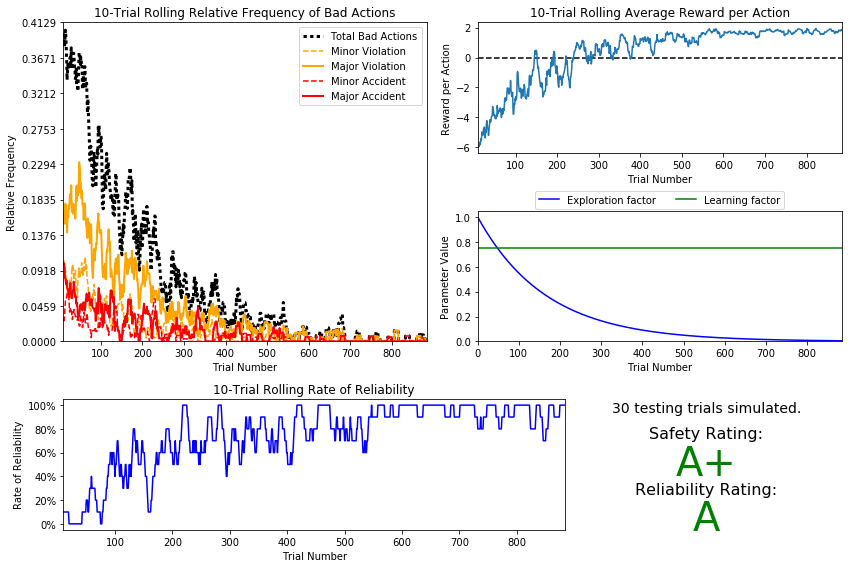

In [9]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

##### Decaying function used:
Unlike the linear decaying function used for epsilon in the default agent, the improved agent uses exponential decay function for the exploration factor.
The function used is as follows:$$ \epsilon = e^{-at}, \textrm{for } 0 < a < 1 $$
This function decays slower than the linear decay function thus allowing more exploration in the begining and more exploiting later. 

This function allows 20 training trails before running the test trials. This decaying function is correctly represented in the parameter panel of the visualization. The exploration factor has a decreasing slope, falling to zero at 20 trials.

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, ϵ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after ϵ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for ϵ.


##### Reliability of Agent:

##### Rewards received of Agent:
As the exploration factor decreases, the reward increases as the agent starts to select optimal action more often than random actions. The frequent highs and lows in the reward plot indicates that the agent is exploting and exploring based on epsilot probability. And as the agent is capable to learn more and use the learned information it is using it to reach to the destination with making very little illegal actions. The rewards suggest that the agent is successfully reaching to its destination with minimal violations and accidents towards the end of the training trails.

##### Number of Trails affecting Result:

##### Reliability of Agent:
Unlike the default agent, the reliability rate has significantly increased here. It is reaching the destination on time most of the time.

- The decaying function is used from the above provided options.$$ \epsilon = e^{-at}, \textrm{for } 0 < a < 1 $$

Here the value of a has been hardcoded into the agent as this would be fixed. 

- This function decays very slowly allowing the mdp to explore enough and then exploit.
- Around 600 training trials were requried before getting a reliable testing

- the tolerance was .005 as i wanted more training trials, in the selected decaying function, the value of a 

- The default Q-learner only has 20 training trials, the alpha was .5 each

##### Similarity between above two observation:
Comparing the above visulaization with the one on the top it is clear that the reliability factor is quite similar
##### Frequency of Bad Actions:
The frequency of the Bad decisions decreases as the number of trails increases, as the agent is able to learn. But we can see that the frequency of accidents plateau suggesting that the agent has been able to learn to avoid voilations but not accidents.  And as the agent is taking actions, the rate of bad actions as decreased from around 45% to 33% and decreasing slowly. This is contrast as compared to the previous visualization where we say that 

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** 

| State (waypoint, light, oncoming, left) | Optimal Policy | Suboptimal Policy |
| --- | --- | --- |
| ('left', 'green', 'forward', 'forward') | Right | Forward |
| ('forward', 'green', 'forward', 'left') | Forward | Right |
|  |  |  |
|  |  |  |
|  |  |  |

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

Rewards are given at random. and the second is the penalty given at each delay in reaching the destination.
There is a planner which defines the next waypoint.


Actions are selected random
Then actions are selected based on policy
Then 


, Q-learning can be used to find an optimal action-selection policy for any given (finite) Markov decision process (MDP).


It has been proven that for any finite MDP, Q-learning eventually finds an optimal policy, in the sense that the expected value of the total reward return over all successive steps, starting from the current state, is the maximum achievable.


However, Q-learning can also learn in non-episodic tasks. If the discount factor is lower than 1, the action values are finite even if the problem can contain infinite loops.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In [11]:
import re
from IPython.display import display
import pandas as pd
pattern = re.compile(r"^(\(([a-zN\,\'\ ])+\))$")
patterna = re.compile(r"\ \-\-\ ([\w]+)\ \:\ (.*)")
table = []
action = []
state = None
df = pd.DataFrame()
for i, line in enumerate(open('logs/sim_improved-learning.txt')):
    match = pattern.match(line)
    matcha = patterna.match(line)
    if match: 
        if state is not None:
            df = df.append([[state] + action], ignore_index = True) 
            print state, action
        state = match.group()
        action = []
    if matcha:
        action += [matcha.group(2)]
    #print re.finditer(pattern, line)
    #for match in re.finditer(pattern, line):
        #print match.groups()
        #table.append(re.split('\W+', match.group(1))[1:6])
#display(len(table))
df = df.append([[state] + action], ignore_index = True)
print state, action

#waypoint light oncoming left 4 - action
print 3 * 2 * 4 * 4 * 4 #action
#display(table)

('forward', 'green', 'right', 'right', 'left') ['-3.62', '2.52', '0.00', '-14.63']
('left', 'red', 'left', 'left', None) ['1.41', '-10.09', '0.75', '-9.85']
('left', 'green', 'forward', 'forward', 'forward') ['-4.41', '0.42', '0.35', '-15.46']
('forward', 'green', 'left', 'right', None) ['0.30', '1.78', '0.46', '0.24']
('forward', 'green', 'right', 'left', 'left') ['-4.56', '2.09', '0.00', '-14.96']
('left', 'green', 'left', None, 'forward') ['0.50', '0.59', '0.74', '2.27']
('right', 'red', None, 'forward', 'right') ['1.40', '-37.17', '0.93', '-39.16']
('forward', 'green', 'left', 'forward', None) ['0.49', '2.32', '0.16', '0.38']
('left', 'red', 'forward', 'right', 'right') ['0.00', '0.00', '1.66', '-7.08']
('right', 'red', 'right', 'forward', 'right') ['1.48', '0.00', '0.00', '-29.35']
('forward', 'red', 'right', None, 'forward') ['2.10', '-39.92', '-19.07', '-39.09']
('forward', 'green', 'left', 'left', 'forward') ['0.09', '1.97', '0.43', '0.53']
('forward', 'red', 'right', 'forward'

In [10]:
df.columns=['State', 'None', 'Forward', 'Right', 'Left']
df.max(axis=0, numeric_only = True)
display(df)

,State,None,Forward,Right,Left
0,"('forward', 'green', 'right', 'right', 'left')",-3.62,2.52,0.00,-14.63
1,"('left', 'red', 'left', 'left', None)",1.41,-10.09,0.75,-9.85
2,"('left', 'green', 'forward', 'forward', 'forwa...",-4.41,0.42,0.35,-15.46
3,"('forward', 'green', 'left', 'right', None)",0.30,1.78,0.46,0.24
4,"('forward', 'green', 'right', 'left', 'left')",-4.56,2.09,0.00,-14.96
5,"('left', 'green', 'left', None, 'forward')",0.50,0.59,0.74,2.27
6,"('right', 'red', None, 'forward', 'right')",1.40,-37.17,0.93,-39.16
7,"('forward', 'green', 'left', 'forward', None)",0.49,2.32,0.16,0.38
8,"('left', 'red', 'forward', 'right', 'right')",0.00,0.00,1.66,-7.08
9,"('right', 'red', 'right', 'forward', 'right')",1.48,0.00,0.00,-29.35


In [ ]:
print df.max(axis=1, numeric_only = True)